In [1]:
import numpy as np
import trident
import yt
import os
import sys
import matplotlib.pyplot as plt
from quasar_scan import *
from parse_vela_metadata import Rdict, Ldict

In [22]:
class MultiQuasarSphereAnalyzer():
    #either load all quasar spheres, load by VELA_SIM, or load by redshift
    #def _init_(self, loadAll = False, VELA_SIM = "", redshift = -1):
    
    def __init__(self, textfiles):
        self.quasarLineup = []
        for textfile in textfiles:
            simparams,scanparams,ions,data = read_values(textfile)
            q = QuasarSphere(simparams = simparams,scanparams = scanparams,ions = ions,data = data)
            self.quasarLineup.append(q)
        print self.quasarLineup

        
    def plot_error_bars(self, quasarLineupIndex, ion, xVar = "r"):
        q = self.quasarLineup[quasarLineupIndex]

        #list of all possibles Rs, with no repeats
        allRadii = q.info[:, 3]
        x = np.unique(allRadii)

        #list of column density AVERAGES corresponding to the respective r
        y = np.zeros(len(x))
        yerr = np.zeros(len(x))

        allRadii = q.info[:, 3]
        
        ionIndex = -1
        for index in range(len(q.ions)):
            if q.ions[index] == ion:
                ionIndex = index
        print ionIndex
        if ionIndex == -1:
            print ("Ion not found. Bruhhh.")
        
        allColdens = q.info[:,11 + ionIndex] 


        #loops to find column density (y) mean and +/- error
        for index in range(len(x)):

            yTemp = allColdens[allRadii == x[index]]
            print x[index]
            logYTemp = np.log10(yTemp)

            #finds mean at given r 
            avg = np.mean(logYTemp)
            y[index] = avg

            stdev = np.std(logYTemp)
            yerr[index] = stdev / np.sqrt(len(logYTemp)-1)


        plt.figure()
        fig, axs = plt.subplots(1, sharex=True)

        #axs.errorbar(x[1:], y[1:], yerr=yerr[1:], fmt='.')
        axs.errorbar(x, y, yerr=yerr, fmt='.')
        axs.set_title('%s Column Density Averages vs Radius' %ion)
        
        


    
        
    #def graph_by_VELA_galaxy():
        
    #def graph_by_redshift():
        
        


0
0.00236151213
0.00472302425
0.00708453638
0.00944604851
0.0118075606
0.0141690728
0.0165305849
0.018892097
0.0212536091
0.0236151213
0.0259766334


<Figure size 432x288 with 0 Axes>

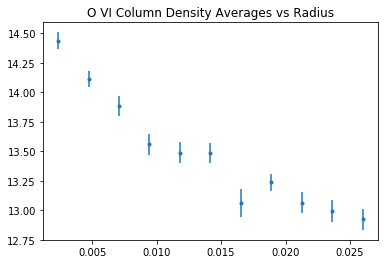

In [24]:
textfile = ['/global/homes/b/bryanw/quasarscan/output/VELA_v2_01coldensinfo/406_of_400-_OVI_NeVIII_HI_CIII_OIV_NIII_MgII_OV_OIII_NIV_MgX_NV_SIV_OII_SIII_SII_SV_SVI_NII_z0.99.txt']
q = MultiQuasarSphereAnalyzer(textfile)

q. plot_error_bars(0, "O VI")